In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("mnist_784.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [4]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [8]:
X_train,X_test, y_train,y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test.shape

(10000,)

In [11]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [12]:
X_train.shape

(60000, 784)

### Training the KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [14]:
y_knn_pred = knn_clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_knn_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  10    5  995    2    1    0    0   16    3    0]
 [   0    1    3  974    1   14    1    7    4    5]
 [   1    5    0    0  950    0    4    3    0   19]
 [   4    0    0    9    2  862    7    1    3    4]
 [   4    2    0    0    3    3  946    0    0    0]
 [   0   17    4    0    3    0    0  994    0   10]
 [   5    2    4   14    5   11    4    4  920    5]
 [   3    4    2    7    9    4    1   10    1  968]]


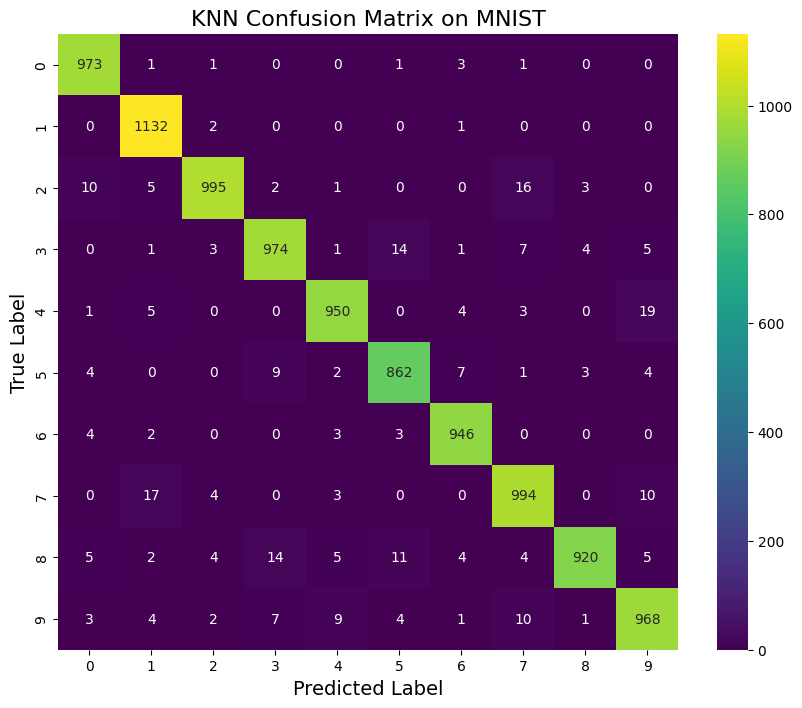

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=True,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("KNN Confusion Matrix on MNIST", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

### Grid Search on KNN Classifier

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  37.2s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  49.1s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  53.5s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  38.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  36.3s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  38.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  33.8s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  43.3s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  36.1s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  37.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  34.5s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [19]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [20]:
grid_search.best_score_

np.float64(0.9716166666666666)

### Testing the Best paramters from KNN on Test set

In [21]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test,y_pred)

0.9714

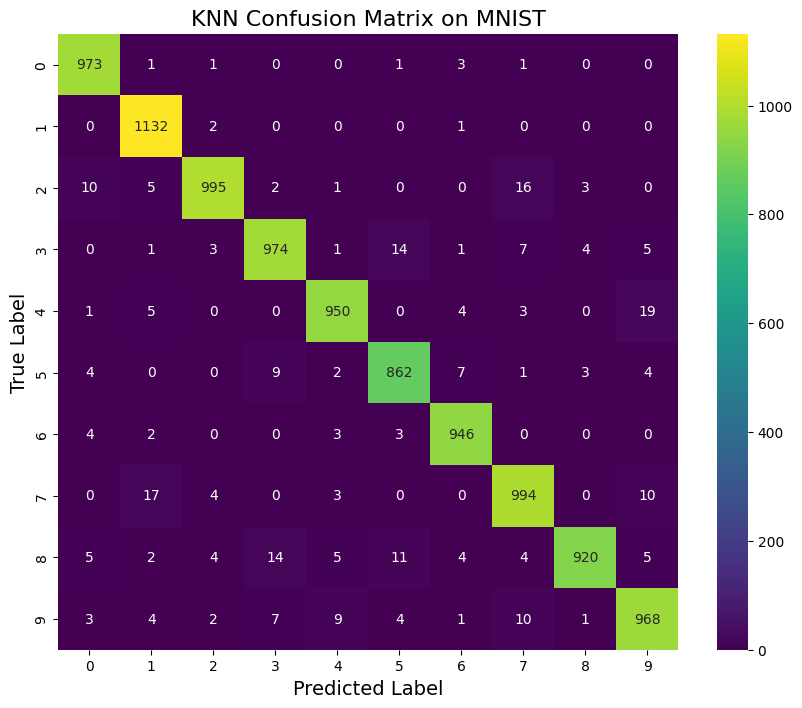

In [22]:
cm_grid = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_grid, annot=True, fmt="d", cmap="viridis", cbar=True,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("KNN Confusion Matrix on MNIST", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

### Comparing the KNN classifier with SGD and Random Forest classifiers

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=13)

In [28]:
# 5. Grid search for hyperparameter tuning
param_grid = {
    'loss': ['hinge', 'log_loss'],
    'alpha': [1e-4, 1e-2],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000],
    'tol': [1e-3]
}

grid_search = GridSearchCV(sgd, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled[:5000], y_train[:5000])  # smaller subset for tuning

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SGDClassifier(random_state=13), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01], 'loss': ['hinge', 'log_loss'],
                         'max_iter': [1000],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [0.001]},
             verbose=1)

In [29]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'alpha': 0.01, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}


In [30]:
## Retrain best SGD model using One-vs-Rest strategy on full data
from sklearn.multiclass import OneVsRestClassifier

best_sgd = grid_search.best_estimator_
ovr_clf = OneVsRestClassifier(best_sgd, n_jobs=-1)
ovr_clf.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.01, random_state=13),
                    n_jobs=-1)

In [31]:
y_pred = ovr_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 90.05%


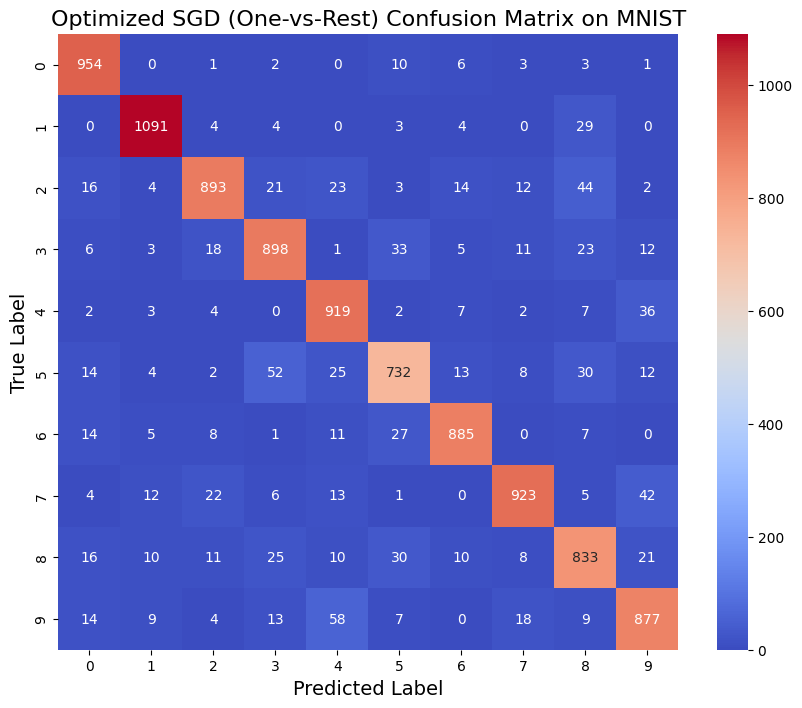

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Optimized SGD (One-vs-Rest) Confusion Matrix on MNIST", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

In [37]:
## Now we do it with RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=13, n_jobs=-1)

In [39]:
#Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=3, verbose=1)
grid_search.fit(X_train_scaled[:5000], y_train[:5000])



Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       n_jobs=-1, random_state=13)

In [55]:
# Evaluate on the test set
y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 97.20%


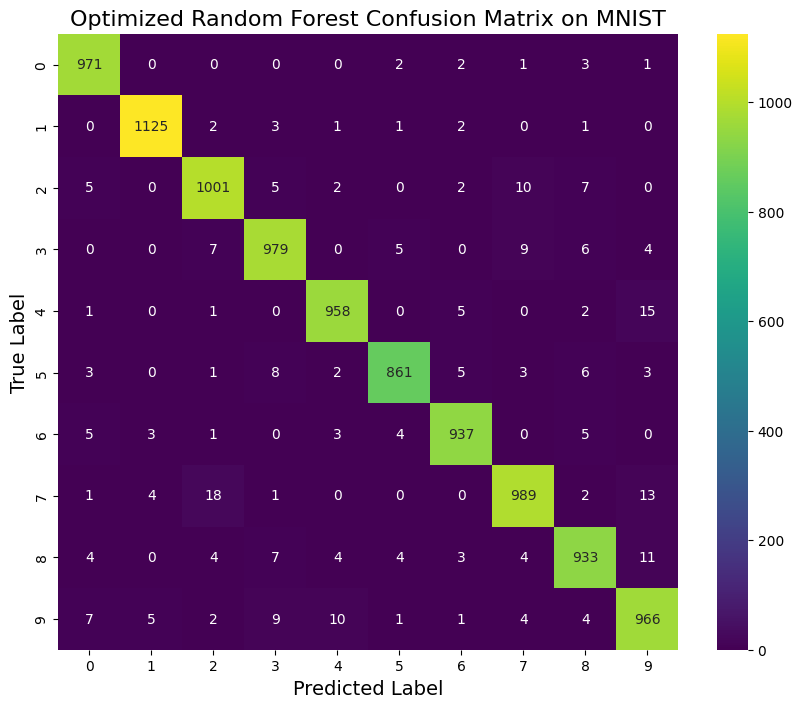

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Optimized Random Forest Confusion Matrix on MNIST", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

### Comparing 3 Models(KNN, SGD, RandomForest) (GRAPHS)

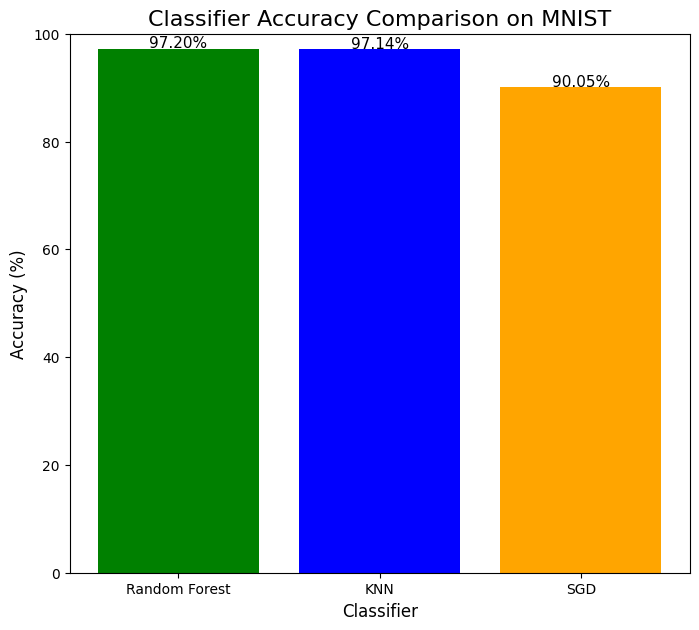

In [53]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['Random Forest', 'KNN', 'SGD']
accuracies = [97.20, 97.14, 90.05]


plt.figure(figsize=(8, 7))
plt.bar(models, accuracies, color=['green', 'blue', 'orange'])
plt.title("Classifier Accuracy Comparison on MNIST", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Classifier", fontsize=12)
for i, acc in enumerate(accuracies):
    plt.text(i, accuracies[i] + 0.2, f"{accuracies[i]:.2f}%", ha='center', fontsize=11)
plt.ylim(0, 100)
plt.show()

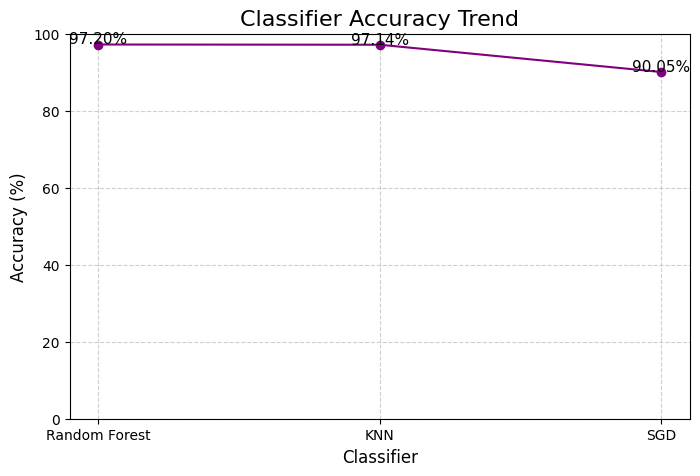

In [52]:

plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='purple')
plt.title("Classifier Accuracy Trend", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Classifier", fontsize=12)
for i, acc in enumerate(accuracies):
    plt.text(i, accuracies[i] + 0.2, f"{accuracies[i]:.2f}%", ha='center', fontsize=11)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()